In [132]:
import torch
import torchvision.transforms as transforms

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

In [133]:
import scipy.io as sio
dataset = sio.loadmat('/Users/naveenmsu/Downloads/train_32x32.mat')

In [134]:
X = dataset['X']
y = dataset['y']
import numpy as np
X = np.transpose(X, (-1, 0, 1, 2)).reshape(-1,32*32*3)

In [135]:
X.shape

(73257, 3072)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [137]:
X_train = X_train.reshape(32, 32, 3, len(X_train))

[8]
[6]
[2]
[3]
[5]
[2]
[3]
[5]
[5]
[3]
[5]
[8]
[3]
[7]
[6]
[8]
[2]
[2]
[8]
[2]


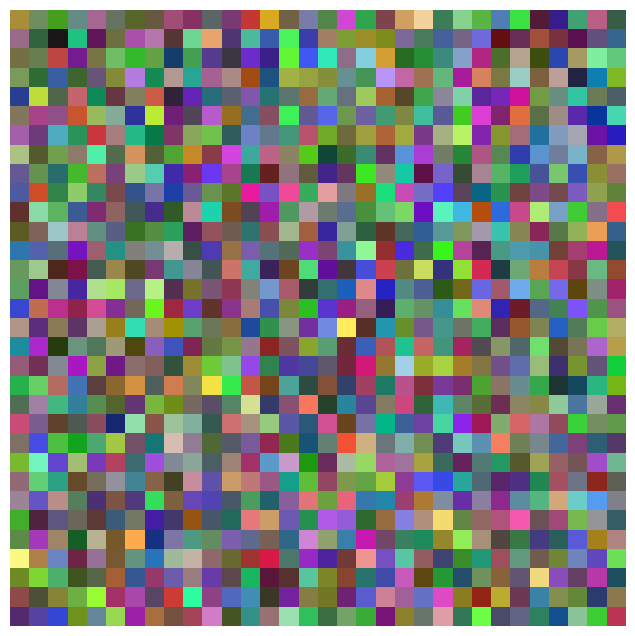

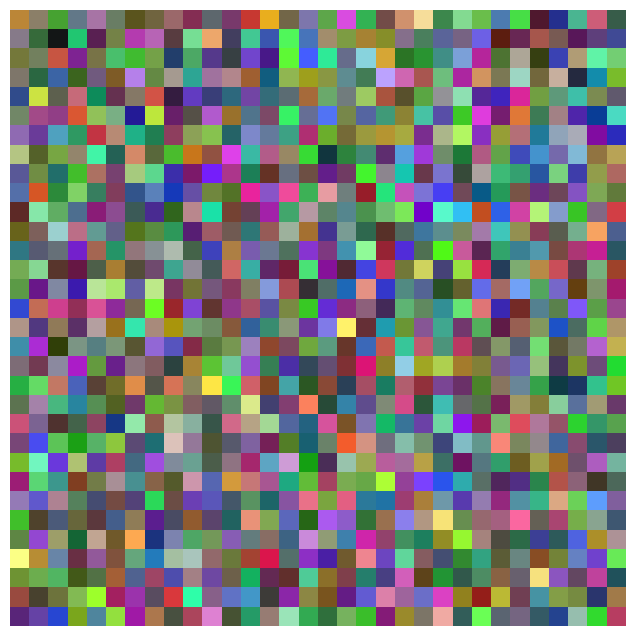

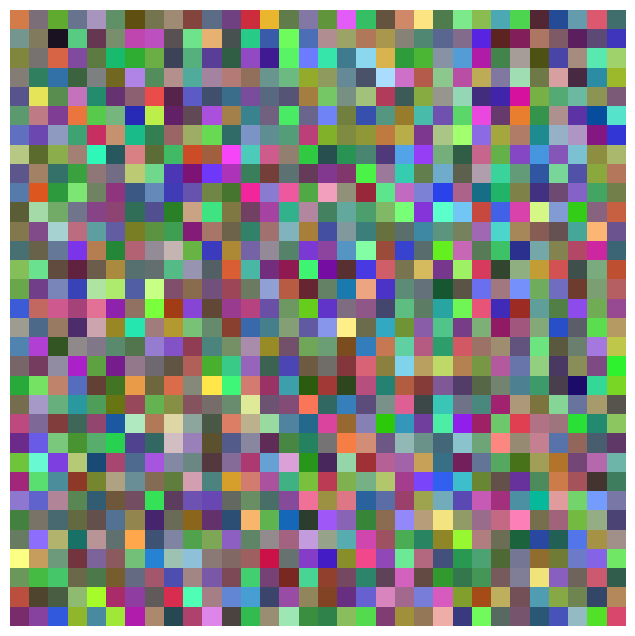

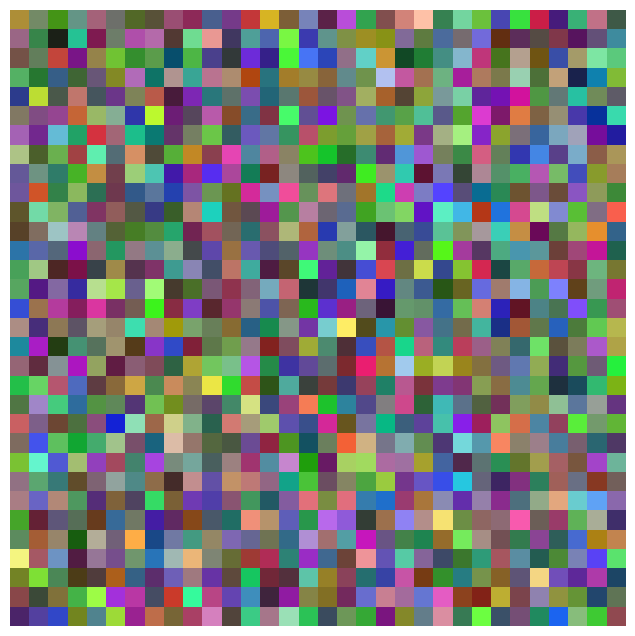

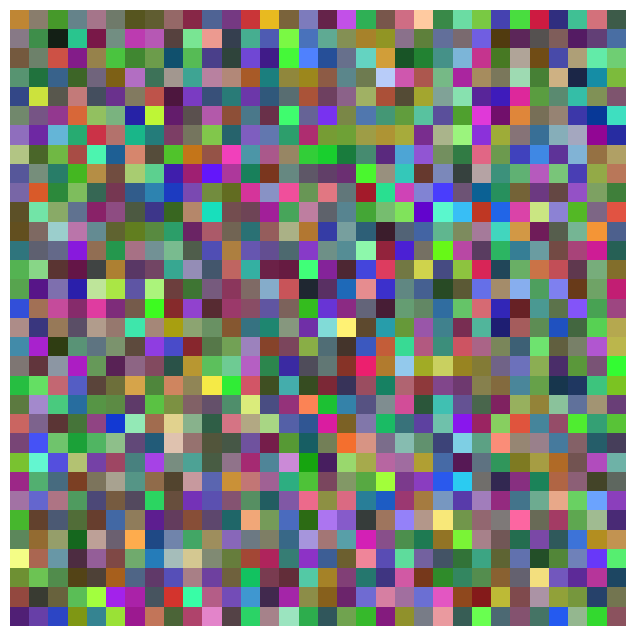

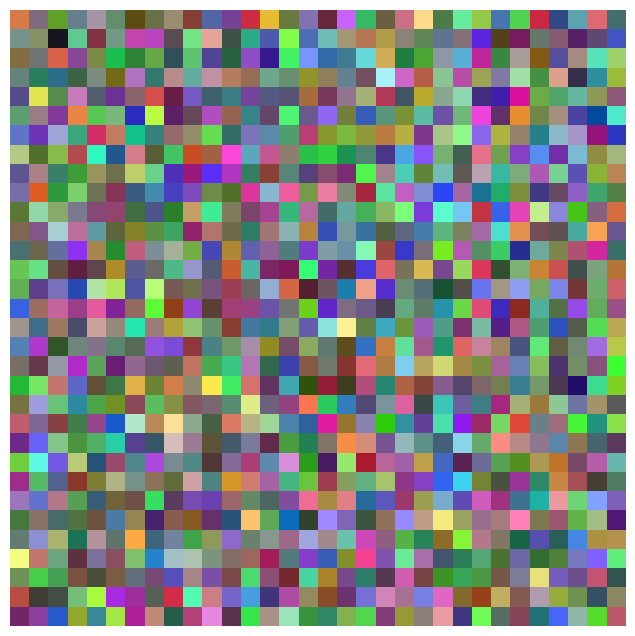

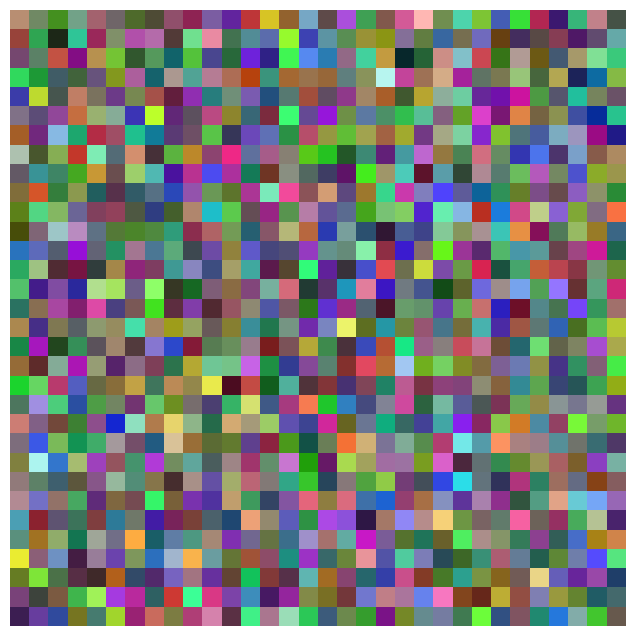

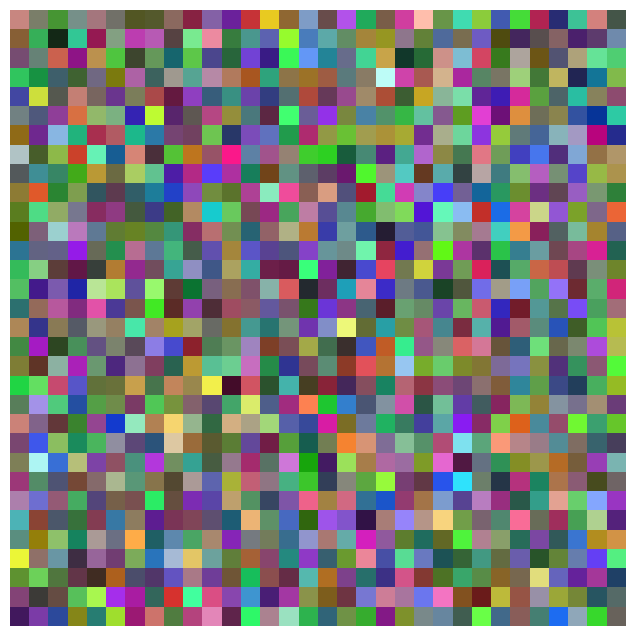

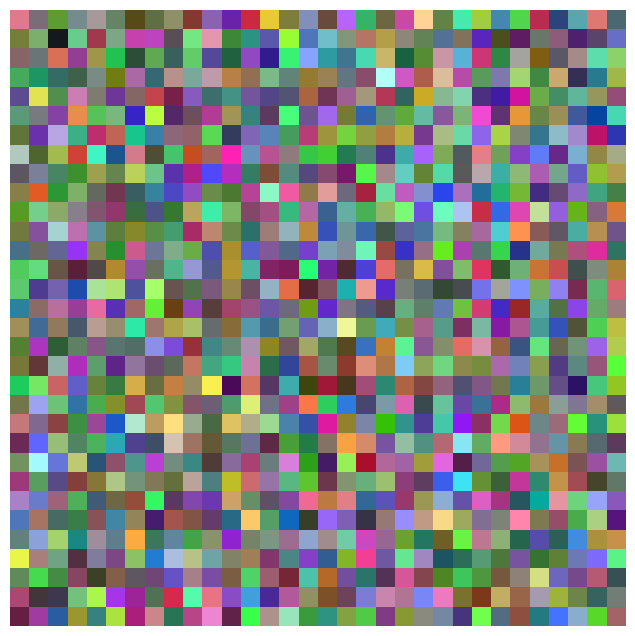

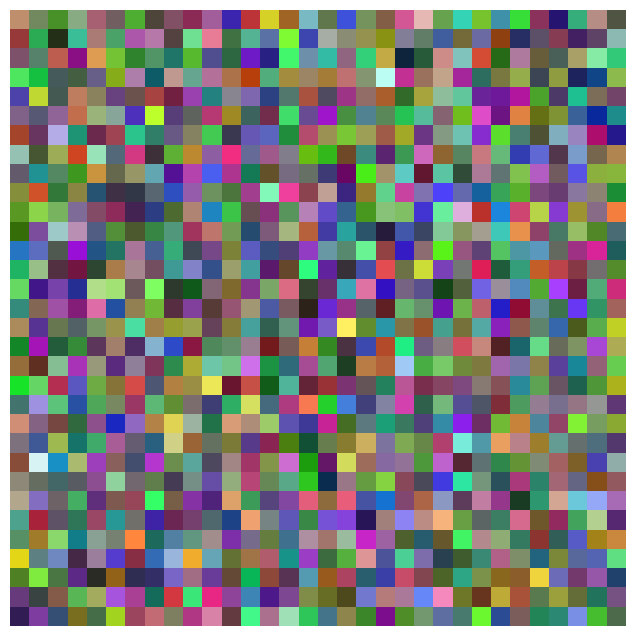

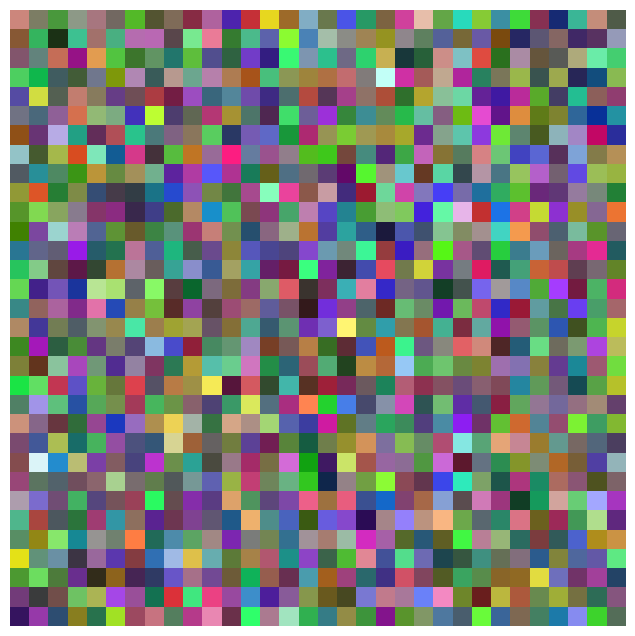

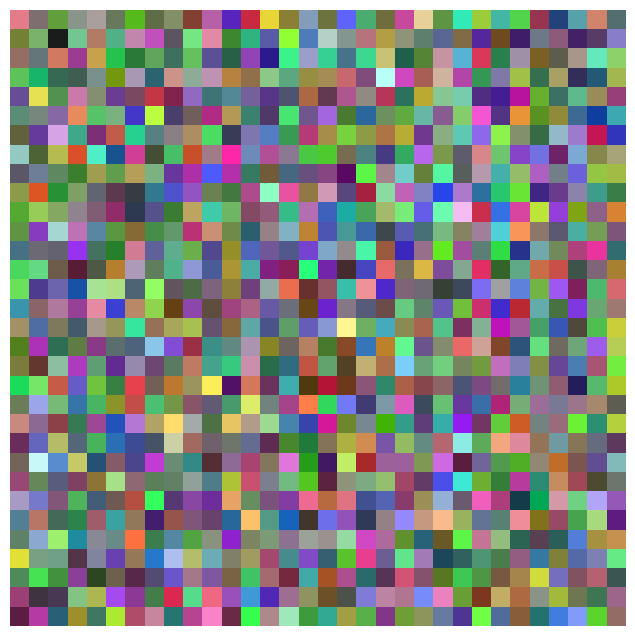

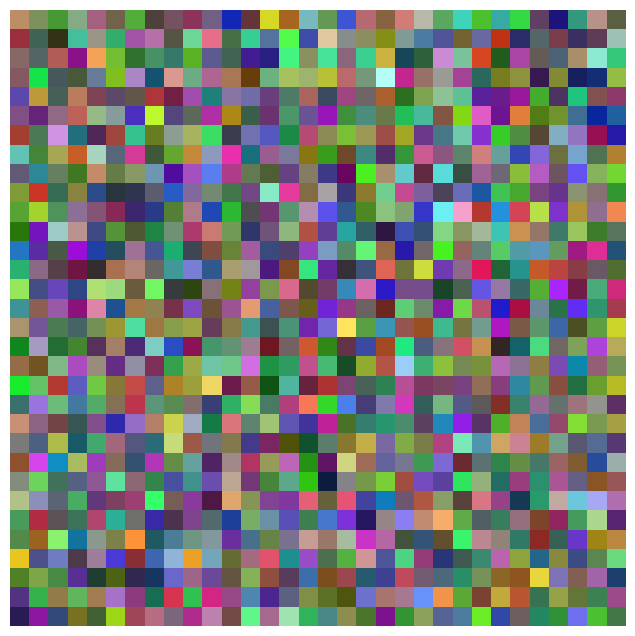

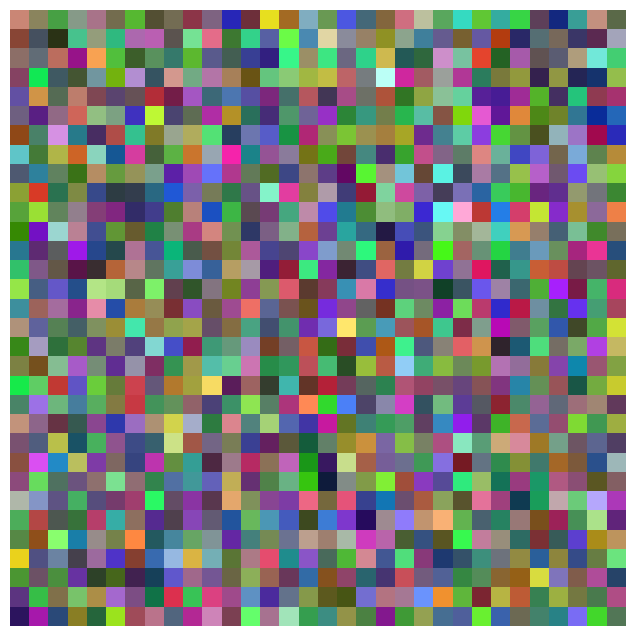

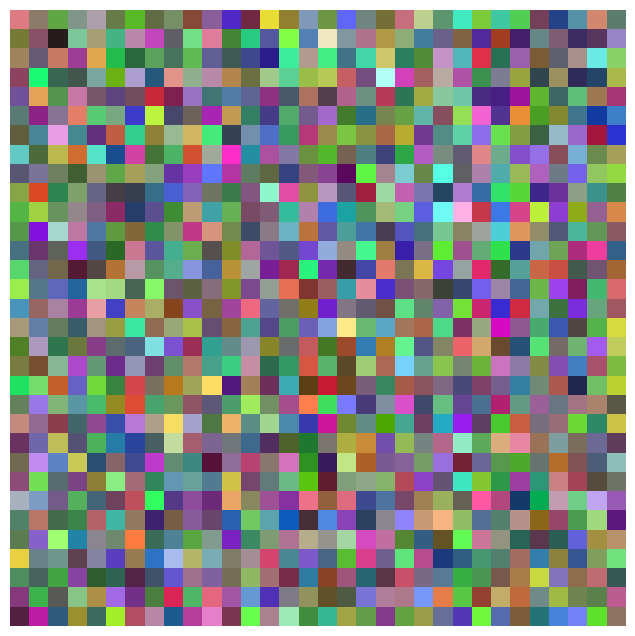

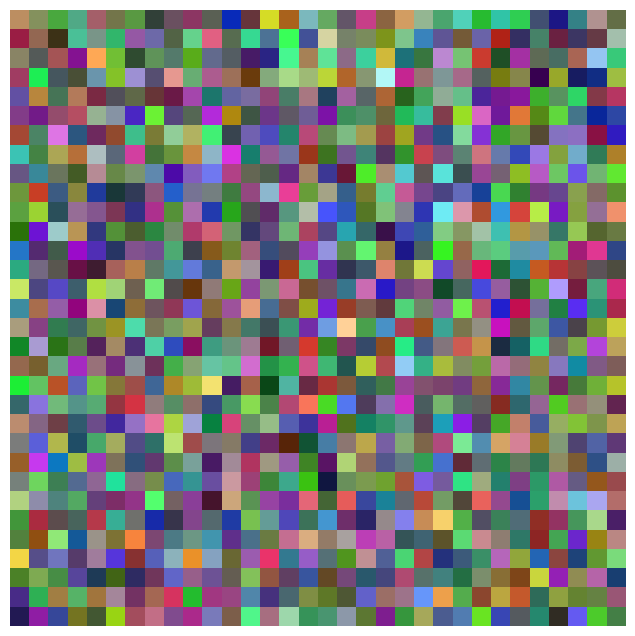

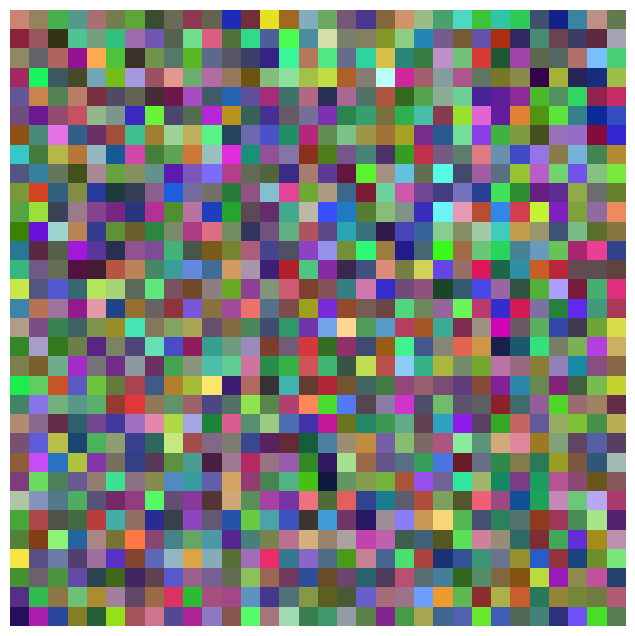

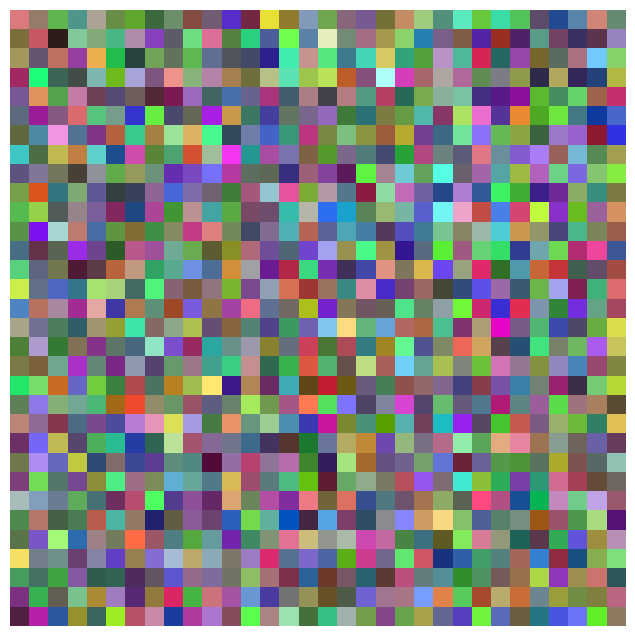

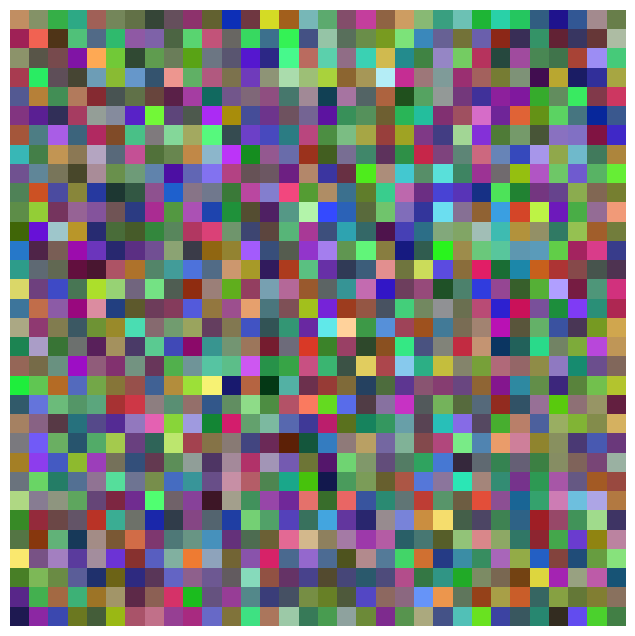

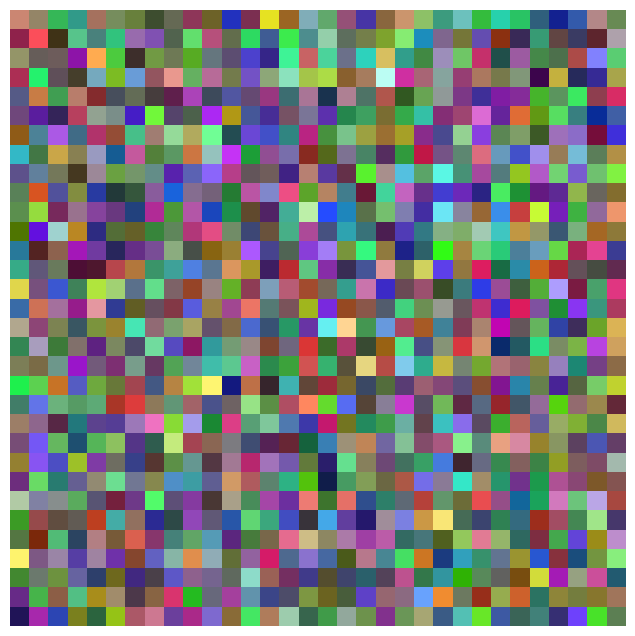

In [152]:
for i in range(20):
    print(y_train[i])
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(X_train[:,:,:,i])

In [65]:
from torchvision.datasets import SVHN
from torchvision.transforms import ToTensor
dataset = SVHN(root='data/', download=True, transform=ToTensor())

Using downloaded and verified file: data/train_32x32.mat


In [67]:
from torch.utils.data import random_split
train_size = int(len(dataset)*0.8)
val_size = len(dataset) - train_size

train_ds, val_ds= random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(58605, 14652)

In [68]:
from torch.utils.data.dataloader import DataLoader
batch_size = 32
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)

In [69]:
import matplotlib.pyplot as plt

images.shape: torch.Size([32, 3, 32, 32])
tensor([2, 0, 1, 7, 5, 4, 7, 4, 5, 2, 7, 3, 4, 2, 1, 3, 7, 3, 2, 4, 1, 0, 6, 4,
        5, 4, 1, 2, 4, 2, 6, 9])


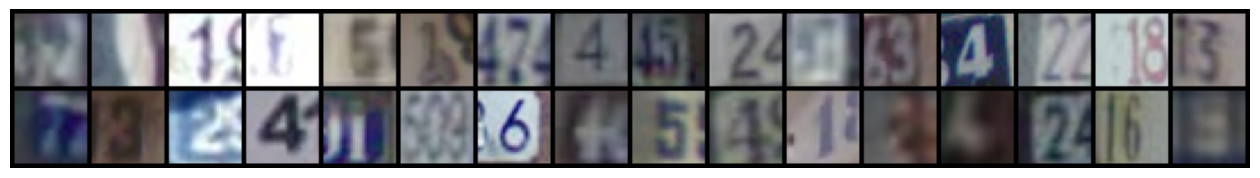

In [70]:
from torchvision.utils import make_grid
for images, labels in train_loader:
    print('images.shape:', images.shape)
    print(labels)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break